## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading & Analysing Our Data

In [2]:
housing = pd.read_csv("HouseData.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Splitting Our Training & Testing Data

In [4]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_data),len(test_data))

404 102


In [5]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In our dataset 35 datapoints have 1 as the value for "CHAS" attribute and it might so happen that all these 35 data points goes into testing data and hence to resolve this issue we use Stratified Shuffle Split.

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    train_strat = housing.loc[train_index]
    test_strat = housing.loc[test_index]

In [7]:
train_strat["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [8]:
test_strat['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## Finding & Understanding Correlations

In [9]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

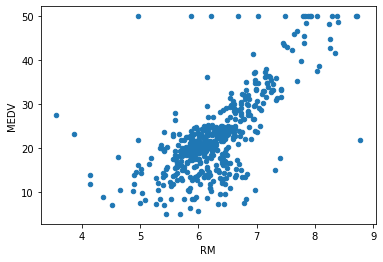

In [10]:
housing.plot(kind="scatter",x="RM",y="MEDV")
plt.show()

In [11]:
training_data = train_strat.drop("MEDV",axis=1)
training_labels = train_strat["MEDV"].copy()

## Use of Imputer For Handling Missing Values

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(training_data)

SimpleImputer(strategy='median')

In [13]:
imputed_data = imputer.transform(training_data)
training_data_new = pd.DataFrame(imputed_data,columns=training_data.columns)

In [14]:
training_data_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Training Our Model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(training_data_new,training_labels)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(training_data_new)
mse = mean_squared_error(training_labels,housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

4.835301058716238


## CrossValidation Of Our Model

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,training_data_new,training_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [18]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [19]:
print_scores(rmse_scores)

Scores:  [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]
Mean:  5.0374827861177405
Standard Deviation:  1.0594382405606968


## Testing Our Model

In [20]:
test_data = test_strat.drop("MEDV",axis=1)
test_labels = test_strat["MEDV"].copy()
final_test_data = imputer.transform(test_data)
test_predictions = model.predict(test_data)
final_mse = mean_squared_error(test_labels,test_predictions)
print(np.sqrt(final_mse))

4.143874870573352
